In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

The original datasets provided at Kaggle are divided into train & test sets.<br>

In [54]:
titanic_test = pd.read_csv('../data/test.csv')
titanic_test_surv = pd.read_csv('../data/gender_submission.csv')

titanic_train = pd.read_csv('../data/train.csv')

print(f'Train Data({len(titanic_train)})+Test Data({len(titanic_test)}): Total {len(titanic_train)+len(titanic_test)} Passenger Data')

Train Data(891)+Test Data(418): Total 1309 Passenger Data


In [55]:
titanic_test = pd.merge(titanic_test,titanic_test_surv,on='PassengerId')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [57]:
titanic = pd.concat([titanic_test,titanic_train],ignore_index=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


# EDA

## Overall Survival Rate

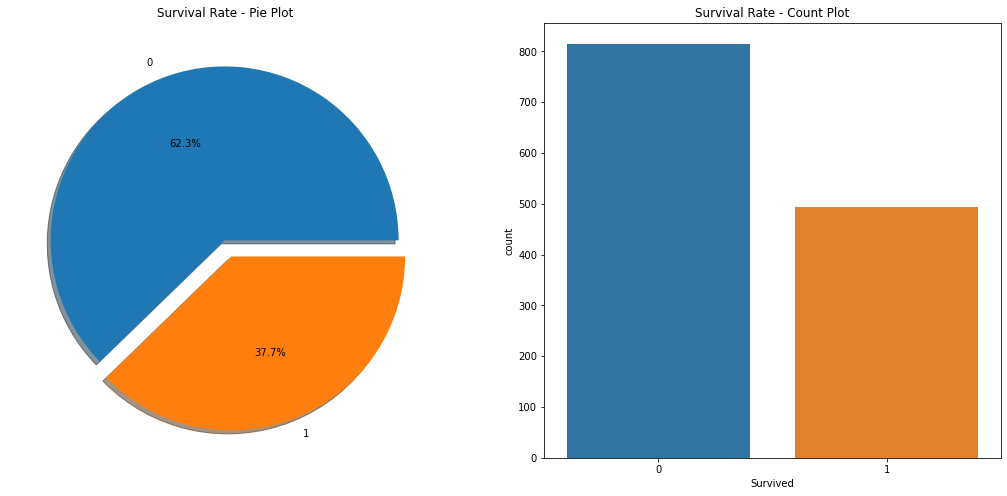

In [67]:
f,ax = plt.subplots(1,2,figsize=(18,8))
titanic['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                           autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Survival Rate - Pie Plot')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=titanic, ax=ax[1])
ax[1].set_title('Survival Rate - Count Plot')

plt.show()

## Survival Rate by Gender

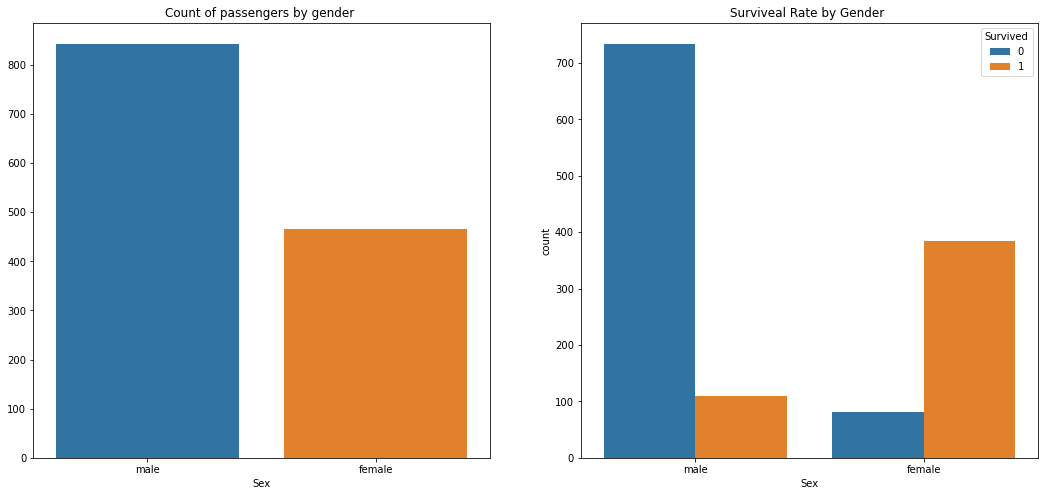

In [69]:
f,ax = plt.subplots(1,2,figsize=(18,8))

sns.countplot(x='Sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of passengers by gender ')
ax[0].set_ylabel('')

sns.countplot(x='Sex', data=titanic, hue='Survived', ax=ax[1])
ax[1].set_title('Surviveal Rate by Gender ')

plt.show()

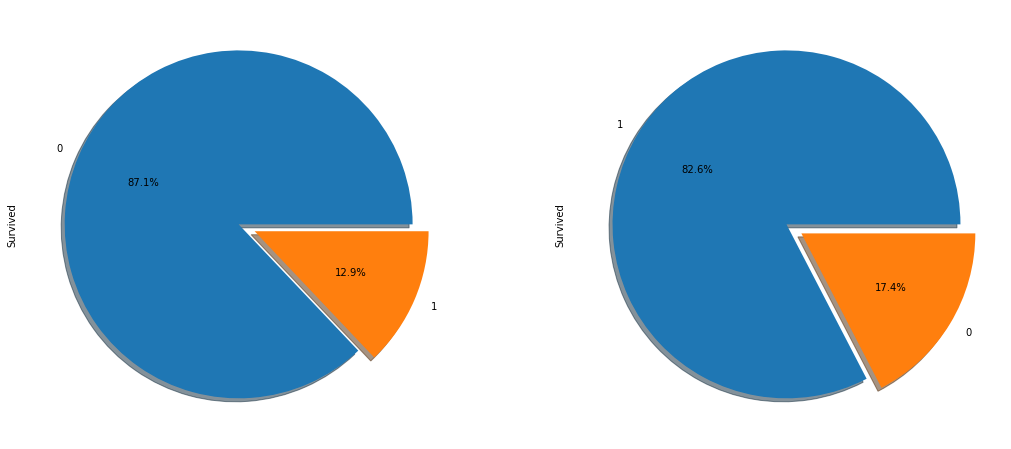

In [105]:
f,ax = plt.subplots(1,2,figsize=(18,8))
titanic[titanic['Sex']=='male']['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                           autopct='%1.1f%%',ax=ax[0],shadow=True)
titanic[titanic['Sex']=='female']['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                           autopct='%1.1f%%',ax=ax[1],shadow=True)                                           
plt.show()                                    